In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor

In [2]:
df=pd.read_csv("data/stud.csv")

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
X=df.drop('math_score', axis=1)

In [5]:
X

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75
...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,99,95
996,male,group C,high school,free/reduced,none,55,55
997,female,group C,high school,free/reduced,completed,71,65
998,female,group D,some college,standard,completed,78,77


In [6]:
y=df['math_score']

In [7]:
numeric_columns=X.select_dtypes(exclude="object").columns
numeric_columns

Index(['reading_score', 'writing_score'], dtype='object')

In [8]:
categories_columns=X.select_dtypes(include="object").columns
categories_columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course'],
      dtype='object')

In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [10]:
scaler=StandardScaler()
oho= OneHotEncoder()

In [11]:
preprocessor=ColumnTransformer([("OneHotEncoder", oho, categories_columns), ("StandardScaler", scaler, numeric_columns)])

In [12]:
X=preprocessor.fit_transform(X)

In [13]:
transformed_data=pd.DataFrame(X)
transformed_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.193999,0.391492
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.427476,1.313269
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.770109,1.642475
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-0.833899,-1.583744
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.605158,0.457333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,2.044215,1.774157
996,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-0.970952,-0.859491
997,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.125472,-0.201079
998,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.605158,0.589015


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, random_state=42, test_size=0.2)

In [15]:
models={"LinearRegression":LinearRegression(),
        "KNeighborsRegressor":KNeighborsRegressor(),
        "DecisionTreeRegressor":DecisionTreeRegressor(),
        "Lasso":Lasso(),
        "Ridge":Ridge(),
        "RandomForestRegressor":RandomForestRegressor(),
        "AdaBoostRegressor":AdaBoostRegressor()}

In [16]:
model_list=[]
r2_list=[]

In [17]:
def evaluate_model(true, predicted):
    mse=mean_squared_error(true, predicted)
    mae=mean_absolute_error(true, predicted)
    rmse= np.sqrt(mse)
    r2score=r2_score(true, predicted)
    return rmse, mae, r2score*100

In [18]:
for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train, y_train)

    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)

    model_train_rmse, model_train_mae, model_train_r2= evaluate_model(y_train, y_train_pred)
    model_test_rmse,  model_test_mae, model_test_r2= evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    print('Model performance for Training set')
    print("-> Root Mean Squared Error: %.2f" % model_train_rmse)
    print("-> Mean Absolute Error: %.2f" % model_train_mae)
    print("-> R2 Score: %.2f" % model_train_r2)
    #print("-> Accuracy score"% accuracy_score(y_train, y_train_pred))
    #print("Root mean value is: %.2f " % model_train_rmse)

    print('-'*35)
    print('Model performance for Test set')
    print("-> Root Mean Squared Error: %.2f" % model_test_rmse)
    print("-> Mean Absolute Error: %.2f" % model_test_mae)
    print("-> R2 Score: %.2f" % model_test_r2)
    #print("-> Accuracy score", accuracy_score(y_test, y_test_pred))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')
    

LinearRegression
Model performance for Training set
-> Root Mean Squared Error: 5.33
-> Mean Absolute Error: 4.27
-> R2 Score: 87.42
-----------------------------------
Model performance for Test set
-> Root Mean Squared Error: 5.42
-> Mean Absolute Error: 4.23
-> R2 Score: 87.92


KNeighborsRegressor
Model performance for Training set
-> Root Mean Squared Error: 5.71
-> Mean Absolute Error: 4.52
-> R2 Score: 85.55
-----------------------------------
Model performance for Test set
-> Root Mean Squared Error: 7.25
-> Mean Absolute Error: 5.62
-> R2 Score: 78.38


DecisionTreeRegressor
Model performance for Training set
-> Root Mean Squared Error: 0.28
-> Mean Absolute Error: 0.02
-> R2 Score: 99.97
-----------------------------------
Model performance for Test set
-> Root Mean Squared Error: 7.68
-> Mean Absolute Error: 6.12
-> R2 Score: 75.76


Lasso
Model performance for Training set
-> Root Mean Squared Error: 6.59
-> Mean Absolute Error: 5.21
-> R2 Score: 80.71
---------------------

In [20]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name','R2 Score']).sort_values(by="R2 Score")


,Model Name,R2 Score
2,DecisionTreeRegressor,75.755984
1,KNeighborsRegressor,78.381299
3,Lasso,82.531973
6,AdaBoostRegressor,84.885798
5,RandomForestRegressor,85.434151
0,LinearRegression,87.924714
4,Ridge,88.059315


In [22]:
lasso_predict=Lasso()
train_lasso=lasso_predict.fit(X_train, y_train)
y_pred=lasso_predict.predict(X_test)
r2score_lasso=r2_score(y_test, y_pred)*100
print("Accuracy score is: %.2f" %r2score_lasso)

Accuracy score is: 82.53


Text(0, 0.5, 'Predicted values')

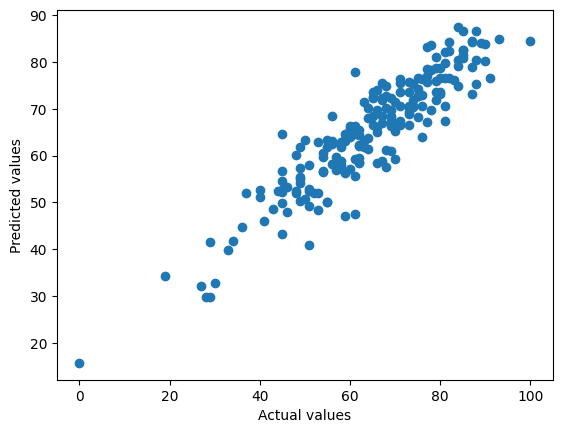

In [24]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")

In [27]:
df_result= pd.DataFrame({"Actual value": y_test, "predicted value": y_pred, "Difference": y_test - y_pred})

In [28]:
df_result

,Actual value,predicted value,Difference
521,91,76.485660,14.514340
737,53,63.009858,-10.009858
740,80,73.675752,6.324248
660,74,75.237667,-1.237667
411,84,80.373144,3.626856
...,...,...,...
408,52,51.974759,0.025241
332,62,58.491434,3.508566
208,74,70.465888,3.534112
613,65,68.472296,-3.472296


In [29]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
